In [27]:
import numpy as np
import pandas as pd
from pandas import Series, DataFrame
from scipy.optimize import minimize, fmin_tnc # optimize the gradient descent
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [28]:
# Used to plot the cost function vs # of iterations
global cf_vs_iter, iter_count
iter_count = 0
cf_vs_iter = DataFrame(columns=['J_theta', '# of iterations'])

### Learning Algorithm

In [29]:
def learning_algorithm(training_set, hypothesis, exponents):
    
    # Clear the list for new cost funtion plot
    global cf_vs_iter, iter_count
    cf_vs_iter = DataFrame(columns=['J_theta', '# of iterations'])
    iter_count = 0
    
    columns = list(training_set.columns) # List of all columns name
    columns.insert(0,'x_0') # Insert the bias feature name
    
    # Insert a bias feature column to the training set
    training_set = training_set.reindex(columns=columns, fill_value=1)
    
    # map the polynomial features incase the hypothesis function is non-linear
    feature_columns = list(training_set.columns)[:-1]
    for i in range(len(feature_columns)):
        training_set[feature_columns[i]] = exponents[i](training_set[feature_columns[i]])
    
    features_count = len(training_set.columns[:-1]) # Number of features
    training_count = len(training_set) # Number of training examples
    thetas = np.zeros(features_count) # Thetas vector

    X = DataFrame.as_matrix(training_set[columns[:-1]]) # The dataframe excluding output y
    Y = np.transpose(np.matrix(training_set[training_set.columns[-1]])) # The output vector

    # minize the cost function using scipy optimization
    result = minimize(fun = cost_function, 
                      x0 = thetas, 
                      args = (X, Y), 
                      method = 'L-BFGS-B', 
                      jac=gradient)
    #result = fmin_tnc(func=cost_function, x0=thetas, fprime=gradient, args=(X, Y))
    #result = minimize(cost_function, thetas, args=(X,Y), method=None, jac=gradient, options={'maxiter':400})
    thetas = result.x
    print(result)
    print(thetas)

    def h(inputs):
        return hypothesis(thetas.transpose(), inputs)
    
    return [h, thetas, X, Y]

### Gradient of Cost Function

In [30]:
def gradient(thetas, X, Y):

    training_count = len(X)
    htheta = sigmoid(X*np.matrix(thetas).transpose())
    gradient = ((1/training_count)*(np.transpose(X)*(htheta-Y))).flatten()
    gradient = np.array(gradient.tolist()[0])

    return gradient

### The Cost Function

In [31]:
def cost_function(thetas, X, Y):

    training_count = len(X)
    htheta = sigmoid(X*np.matrix(thetas).transpose())
    cost = np.sum(np.multiply(np.log(htheta),-Y)-np.multiply((1-Y),np.log(1-htheta))) / training_count # Compute the cost

    # For plotting cost vs iteration
    global cf_vs_iter, iter_count
    cf_vs_iter = cf_vs_iter.append(DataFrame([[cost,iter_count]], columns=['J_theta', '# of iterations']), ignore_index=True)
    iter_count += 1

    return cost

### The Sigmoid Function 

In [32]:
def sigmoid(z):
    return 1/(1+np.exp(-z))

### Classifier Generator

In [33]:
def hypothesis_builder(lambdas):
    def hypothesis(thetas, features):        
        features.insert(0,1)
        features = np.matrix(features)

        return sigmoid(np.sum(features*np.matrix(thetas).transpose()))
    return hypothesis

### Function for Plotting Data

In [34]:
# Plot data function got from online resource at
# http://nbviewer.jupyter.org/github/JWarmenhoven/Machine-Learning/blob/master/notebooks/Programming%20Exercise%202%20-%20Logistic%20Regression.ipynb
def plotData(data, label_x, label_y, label_pos, label_neg, axes=None):
    # Get indexes for class 0 and class 1
    neg = data[:,2] == 0
    pos = data[:,2] == 1
    
    # If no specific axes object has been passed, get the current axes.
    if axes == None:
        axes = plt.gca()
    axes.scatter(data[pos][:,0], data[pos][:,1], marker='+', c='k', s=60, linewidth=2, label=label_pos)
    axes.scatter(data[neg][:,0], data[neg][:,1], c='y', s=60, label=label_neg)
    axes.set_xlabel(label_x)
    axes.set_ylabel(label_y)
    axes.legend(frameon= True, fancybox = True);

### Load Data

In [35]:
# Load training set
training_data = DataFrame.from_csv('ex2data2.txt', index_col=None)
print(training_data.ix[0:10])

         x_1       x_2  y
0   0.051267  0.699560  1
1  -0.092742  0.684940  1
2  -0.213710  0.692250  1
3  -0.375000  0.502190  1
4  -0.513250  0.465640  1
5  -0.524770  0.209800  1
6  -0.398040  0.034357  1
7  -0.305880 -0.192250  1
8   0.016705 -0.404240  1
9   0.131910 -0.513890  1
10  0.385370 -0.565060  1


D:\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  This is separate from the ipykernel package so we can avoid doing imports until


### Plot Classification Data

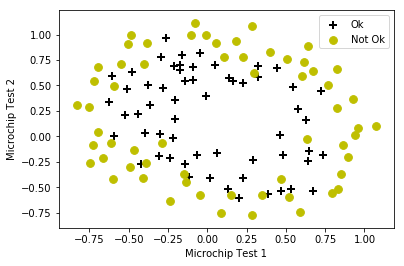

In [36]:
# Plot classification data
plotData(training_data.as_matrix(), 'Microchip Test 1', 'Microchip Test 2', 'Ok', 'Not Ok')

In [37]:
# Hypothesis function of of form: h(x) = theta0*x_0 + theta1*x_1 + theta2*x_2
# with x_0 = 1 by convention
polynomial_map = []
polynomial_map.append(lambda x : 1) # x_0
polynomial_map.append(lambda x : x) # x_1
polynomial_map.append(lambda x : x) # x_2

In [38]:
# Create the hypothesis model
h = hypothesis_builder(polynomial_map)

In [39]:
# Run gradient descent algorithm
# result[0] = classifier
# result[1] = thetas
# results[2] = X
# results[3] = Y
result = learning_algorithm(training_data, h, polynomial_map)

      fun: 0.69024112201757926
 hess_inv: <3x3 LbfgsInvHessProduct with dtype=float64>
      jac: array([ -5.45360858e-07,  -2.85837238e-08,  -1.36970609e-07])
  message: b'CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL'
     nfev: 7
      nit: 5
   status: 0
  success: True
        x: array([-0.01418621, -0.30352121, -0.01813235])
[-0.01418621 -0.30352121 -0.01813235]


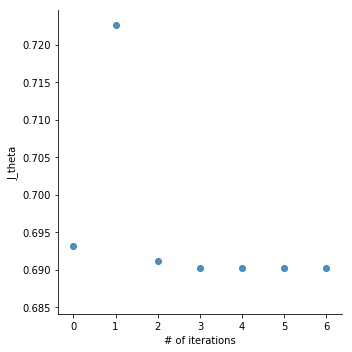

In [40]:
# Plot cost function vs # iterations
plot = sns.lmplot(x="# of iterations", y="J_theta",data=cf_vs_iter, fit_reg=False)
axes = plot.axes

In [41]:
# Should be around 77%
print('For a student with scores 45 and 85, we predict an admission probability of', result[0]([45,85]))

For a student with scores 45 and 85, we predict an admission probability of 2.46996809909e-07


In [42]:
def predict(theta, X, threshold=0.5):
    p = sigmoid(X.dot(theta.T)) >= threshold
    return(p.astype('int'))

In [43]:
# Display the training accuracy
p = predict(result[1], result[2])
print('Train accuracy is {}%'.format(100*sum(p == np.array(result[3].flatten().tolist()[0]).ravel())/p.size))

Train accuracy is 55.08474576271186%


NameError: name 'costFunctionReg' is not defined

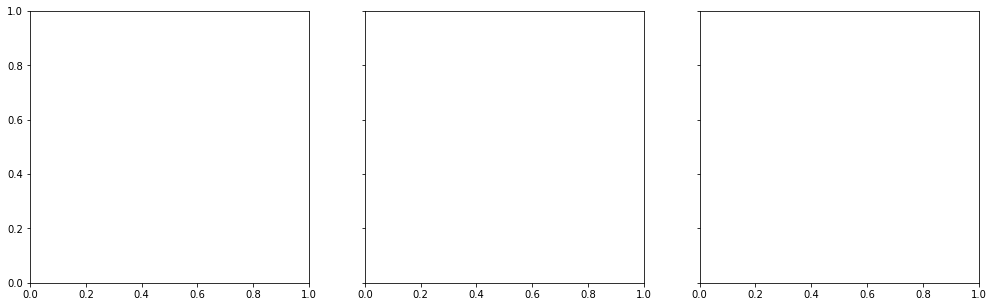

In [44]:
# Display the decision boundary
# Source code: # http://nbviewer.jupyter.org/github/JWarmenhoven/Machine-Learning/blob/master/notebooks/Programming%20Exercise%202%20-%20Logistic%20Regression.ipynb
X = result[2]
thetas = result[1]

fig, axes = plt.subplots(1,3, sharey = True, figsize=(17,5))

# Decision boundaries
# Lambda = 0 : No regularization --> too flexible, overfitting the training data
# Lambda = 1 : Looks about right
# Lambda = 100 : Too much regularization --> high bias

for i, C in enumerate([0, 1, 100]):
    # Optimize costFunctionReg
    res2 = minimize(costFunctionReg, initial_theta, args=(C, XX, y), method=None, jac=gradientReg, options={'maxiter':3000})
    
    # Accuracy
    accuracy = 100*sum(predict(res2.x, XX) == y.ravel())/y.size    

    # Scatter plot of X,y
    plotData(data2, 'Microchip Test 1', 'Microchip Test 2', 'y = 1', 'y = 0', axes.flatten()[i])
    
    # Plot decisionboundary
    x1_min, x1_max = X[:,0].min(), X[:,0].max(),
    x2_min, x2_max = X[:,1].min(), X[:,1].max(),
    xx1, xx2 = np.meshgrid(np.linspace(x1_min, x1_max), np.linspace(x2_min, x2_max))
    h = sigmoid(poly.fit_transform(np.c_[xx1.ravel(), xx2.ravel()]).dot(res2.x))
    h = h.reshape(xx1.shape)
    axes.flatten()[i].contour(xx1, xx2, h, [0.5], linewidths=1, colors='g');       
    axes.flatten()[i].set_title('Train accuracy {}% with Lambda = {}'.format(np.round(accuracy, decimals=2), C))